## Exploring the Provided Asset Data

In this notebook we will explore the provided asset data and show you how to work with it

You can download the train data here [Google Drive Link](https://drive.google.com/file/d/1ruCDFeUqLEkPDfSLBqDMf8swyU1ECEwq/view?usp=sharing)

In [2]:
## Loading the Data
import pandas as pd

# Read the training and testing data from CSV files
train_df = pd.read_csv('train_data_50.csv') # TODO: make sure that the train_data.csv file is in the same directory as this!

# change date into datetime objects
train_df['Date'] = pd.to_datetime(train_df['Date'])

# set indexes 
train_df.set_index(["Ticker", "Date"], inplace=True)

print(train_df)

                        Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
ZJ     2015-07-06   5.699535   5.758382   5.695429   5.747890   5.193889   
       2015-07-07   5.742872   5.754733   5.646161   5.733748   5.181111   
       2015-07-08   5.678550   5.685849   5.590051   5.591420   5.052501   
       2015-07-09   5.649811   5.659391   5.438599   5.477374   4.949447   
       2015-07-10   5.562680   5.649811   5.529379   5.623808   5.081768   
...                      ...        ...        ...        ...        ...   
ZA     2021-04-05  10.455685  10.459335  10.244017  10.309707   9.270878   
       2021-04-06  10.371748  10.499479  10.265913  10.280512   9.244624   
       2021-04-07  10.289635  10.358975  10.262265  10.326130   9.285647   
       2021-04-08  10.205698  10.233069  10.094389  10.218471   9.188834   
       2021-04-09  10.218471  10.298759  10.132709  10.194749   9.167504   

           

We use pandas data-frames to load the data from the CSV as we add the asset "Ticker" and the price "Date" as the index into the Dataframe. This allows us to index the dataframe depending on what asset we want to look at. We can also see that every asset has  *daily* price data for `Open`, `High`, `Low`, `Close`, and `Adj Close`.

In [3]:
# we can see that our dataframe (df) has index values of (Ticker, Date)
train_df.index

MultiIndex([('ZJ', '2015-07-06'),
            ('ZJ', '2015-07-07'),
            ('ZJ', '2015-07-08'),
            ('ZJ', '2015-07-09'),
            ('ZJ', '2015-07-10'),
            ('ZJ', '2015-07-13'),
            ('ZJ', '2015-07-14'),
            ('ZJ', '2015-07-15'),
            ('ZJ', '2015-07-16'),
            ('ZJ', '2015-07-17'),
            ...
            ('ZA', '2021-03-26'),
            ('ZA', '2021-03-29'),
            ('ZA', '2021-03-30'),
            ('ZA', '2021-03-31'),
            ('ZA', '2021-04-01'),
            ('ZA', '2021-04-05'),
            ('ZA', '2021-04-06'),
            ('ZA', '2021-04-07'),
            ('ZA', '2021-04-08'),
            ('ZA', '2021-04-09')],
           names=['Ticker', 'Date'], length=72600)

In [4]:
# First let us see what tickers are in the data
tickers = sorted(train_df.index.get_level_values('Ticker').unique())

tickers

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'ZA',
 'ZB',
 'ZC',
 'ZD',
 'ZE',
 'ZF',
 'ZG',
 'ZH',
 'ZI',
 'ZJ',
 'ZK',
 'ZL',
 'ZM',
 'ZN',
 'ZO',
 'ZP',
 'ZQ',
 'ZR',
 'ZS',
 'ZT',
 'ZU',
 'ZV',
 'ZW',
 'ZX']

We can see that there are 50 different assets in the data with names "A" through "ZV".

In [5]:
# We can then find the min,max date range of our data
# Find the maximum and minimum dates
max_date = train_df.index.get_level_values('Date').max()
min_date = train_df.index.get_level_values('Date').min()
print("max date:",max_date)
print("min date:",min_date)

max date: 2021-04-09 00:00:00
min date: 2015-07-06 00:00:00


In [6]:
# If we want to look at the close price data for asset "A"
A_close_data = train_df.loc["A"]["Close"]
A_close_data

Date
2015-07-06    17.247318
2015-07-07    17.132361
2015-07-08    16.876899
2015-07-09    16.977260
2015-07-10    17.265567
                ...    
2021-04-05    67.208344
2021-04-06    67.436435
2021-04-07    67.711965
2021-04-08    68.927234
2021-04-09    69.354219
Name: Close, Length: 1452, dtype: float64

We can see that this data has index of "Date" and the close price data doesn't actually have a column name but can be accessed with `A_close_data.values`

In [7]:
# We can access the dates and close values separately 
# in this case the index of the data has become only the dates column
print("Date index:", A_close_data.index)
print("Close price values:", A_close_data.values)


Date index: DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-13', '2015-07-14', '2015-07-15',
               '2015-07-16', '2015-07-17',
               ...
               '2021-03-26', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09'],
              dtype='datetime64[ns]', name='Date', length=1452, freq=None)
Close price values: [17.24731847 17.13236118 16.87689913 ... 67.71196503 68.92723385
 69.35421928]


In [8]:
# We can theoretical index into a specific date to get the close price at that date
# not really ideal though
A_close_data.loc[pd.to_datetime('2017-11-09')]

27.24134733998618

In [9]:
# We can also loop through the dates and close prices
for date, close_price in A_close_data.items():
    print(f"Date: {date}, Close Price: {close_price}")

Date: 2015-07-06 00:00:00, Close Price: 17.24731847360376
Date: 2015-07-07 00:00:00, Close Price: 17.13236117723157
Date: 2015-07-08 00:00:00, Close Price: 16.876899126470523
Date: 2015-07-09 00:00:00, Close Price: 16.977259665319707
Date: 2015-07-10 00:00:00, Close Price: 17.265566856780833
Date: 2015-07-13 00:00:00, Close Price: 17.426142326783342
Date: 2015-07-14 00:00:00, Close Price: 17.38417299449473
Date: 2015-07-15 00:00:00, Close Price: 17.380524153153022
Date: 2015-07-16 00:00:00, Close Price: 17.48453353334391
Date: 2015-07-17 00:00:00, Close Price: 17.531976823723173
Date: 2015-07-20 00:00:00, Close Price: 17.74729465894455
Date: 2015-07-21 00:00:00, Close Price: 17.646934120095366
Date: 2015-07-22 00:00:00, Close Price: 17.6779541440465
Date: 2015-07-23 00:00:00, Close Price: 17.36410227888107
Date: 2015-07-24 00:00:00, Close Price: 17.48635865009285
Date: 2015-07-27 00:00:00, Close Price: 17.223597524492217
Date: 2015-07-28 00:00:00, Close Price: 17.36410227888107
Date: 2

In [28]:
def calculate_rolling_30_day_rate_of_return(df):
    # Sort the data by Ticker and Date (this should already be done in your cleaned DataFrame)
    df.sort_index(inplace=True)
    
    # Calculate the rate of return for each 30-day period for each stock
    df['Rate_of_Return'] = df.groupby('Ticker')['Close'].pct_change(periods=30) * 100
    
    return df

# Example usage:
# Assuming you've already loaded and prepared your data into train_df
result = calculate_rolling_30_day_rate_of_return(train_df)
print(result)

                        Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
A      2015-07-06  17.042950  17.276515  17.011930  17.247318  16.396873   
       2015-07-07  17.250969  17.250969  16.840405  17.132361  16.315202   
       2015-07-08  16.964487  17.019228  16.811209  16.876899  16.071924   
       2015-07-09  17.103166  17.177979  16.968135  16.977260  16.167495   
       2015-07-10  17.234545  17.334906  17.167031  17.265567  16.442054   
...                      ...        ...        ...        ...        ...   
ZX     2021-04-05  56.537339  57.634002  56.519091  57.551887  54.198678   
       2021-04-06  57.225259  57.650424  57.137676  57.256282  53.920297   
       2021-04-07  57.084757  57.504448  56.736234  57.017243  53.695185   
       2021-04-08  57.059214  57.524517  56.674194  57.374888  54.031992   
       2021-04-09  57.546413  58.267182  57.433281  58.250760  54.856845   

           

In [32]:
import pandas as pd

def calculate_rolling_30_day_rate_of_return(df):
    # Sort the data by Ticker and Date (this should already be done in your cleaned DataFrame)
    df.sort_index(inplace=True)
    
    # Calculate the rate of return for each 30-day period for each stock
    df['Rate_of_Return'] = df.groupby('Ticker')['Close'].pct_change(periods=20) * 100
    
    # Count the number of times the percentage change crosses 0 for each stock
    df['Crossed_0'] = (df['Rate_of_Return'] > 0) & (df['Rate_of_Return'].shift(-1) <= 0)
    
    return df

# Example usage:
# Assuming you've already loaded and prepared your data into train_df
result = calculate_rolling_30_day_rate_of_return(train_df)

# Count the number of times the percentage change crosses 0 for each stock
crossed_0_counts = result.groupby('Ticker')['Crossed_0'].sum()
print(crossed_0_counts)


Ticker
A     73
B     86
C     59
D     75
E     68
F     67
G     72
H     70
I     72
J     67
K     72
L     72
M     66
N     65
O     69
P     63
Q     68
R     82
S     59
T     86
U     68
V     61
W     67
X     67
Y     69
Z     83
ZA    71
ZB    68
ZC    72
ZD    57
ZE    90
ZF    81
ZG    53
ZH    76
ZI    76
ZJ    56
ZK    81
ZL    79
ZM    78
ZN    65
ZO    74
ZP    72
ZQ    58
ZR    69
ZS    70
ZT    81
ZU    68
ZV    72
ZW    79
ZX    67
Name: Crossed_0, dtype: int64


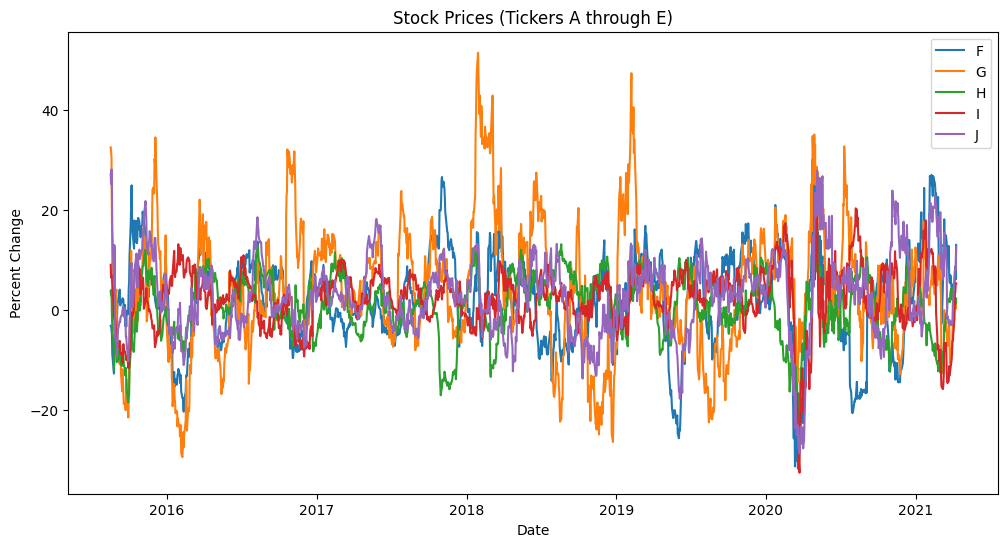

In [29]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only tickers A through E
filtered_tickers = ['A', 'B', 'C', 'D', 'E']
filtered_tickers2 = ['F', 'G', 'H', 'I', 'J']
filtered_df = train_df[train_df.index.get_level_values('Ticker').isin(filtered_tickers2)]

plt.figure(figsize=(12, 6))

for ticker in filtered_tickers2:
    stock_close_data = filtered_df.loc[ticker]['Rate_of_Return']
    plt.plot(stock_close_data.index, stock_close_data.values, label=f'{ticker}')

plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Stock Prices (Tickers A through E)')
plt.legend()
plt.show()


It can also be useful to put the stocks prices into a Numpy array so it is easier to manipulate. Below we will do that with the stock prices. Also note here that we sort the tickers so that the first index will refer to "A", the second to "B" and so on.

In [15]:
import numpy as np

tickers = sorted(train_df.index.get_level_values('Ticker').unique())

close_prices = []

for ticker in tickers:
    stock_close_data = train_df.loc[ticker]["Close"]
    close_prices.append(stock_close_data.values)

close_prices = np.stack(close_prices)


print(f"Tickers {tickers}")
print(f"close_prices shape: {close_prices.shape}") # (50, 1258)
print(f"close_prices:\n{close_prices}")

Tickers ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'ZA', 'ZB', 'ZC', 'ZD', 'ZE', 'ZF', 'ZG', 'ZH', 'ZI', 'ZJ', 'ZK', 'ZL', 'ZM', 'ZN', 'ZO', 'ZP', 'ZQ', 'ZR', 'ZS', 'ZT', 'ZU', 'ZV', 'ZW', 'ZX']
close_prices shape: (50, 1452)
close_prices:
[[ 40.50902652  40.80603823  40.33164471 ...  67.49167067  67.22766096
   66.5181337 ]
 [ 18.31156536  18.2744389   18.24968897 ... 103.08763539 104.46956502
  105.54210799]
 [ 55.3595866   54.79856519  52.82261844 ... 199.02225251 200.26805755
  200.10717044]
 ...
 [ 12.99424007  12.96227037  12.64050795 ...  52.76074048  53.77552837
   54.86456919]
 [ 50.39290206  49.79062657  48.99859746 ... 150.83219461 150.52280794
  155.22959938]
 [ 11.2286732   11.28642591  11.13379481 ...  21.35593062  21.41368254
   21.48793547]]


That is all for the data demo but good luck and happy coding!